In [1]:
import warnings
warnings.filterwarnings('ignore')

## 패션 MNIST 데이터 불러와 전처리하기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# 60000x28x28x1이 됨
# keras는 입력데이터가 3차원일 것으로 가정하기 때문(28*28*3) (3은 rgb)

train_scaled, val_scaled, train_target, val_target = train_test_split(
  train_scaled, train_target, test_size=0.2, random_state=42
)

- keras에서 입력데이터가 3차원으로 있을 것으로 구성되어 있을 것이라 가정하고 있음(keras는 3채널 데이터(RGB)) - 1차원을 추가함
- train set을 train과 valid로 구분함

## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

2022-07-21 11:54:24.635869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.add(
  keras.layers.Conv2D(
    filters=32,
    kernel_size=3, # 3x3 크기의 필터
    activation='relu',
    padding = 'same',
    input_shape=(28, 28, 1)
  )
)

In [5]:
model.add(keras.layers.MaxPooling2D(pool_size=2))

In [6]:
model.add(
  keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu',
    padding = 'same'
  )
)

In [7]:
model.add(keras.layers.MaxPooling2D(pool_size=2))


In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

## Model Complie과 훈련

In [10]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

checkpint_cb = keras.callbacks.ModelCheckpoint(
  filepath='fashion_mnist.h5',
)                             
# 처음 할 때는 early stopping은 안쓰는 것이 좋음
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
  train_scaled,
  train_target,
  epochs=20,
  validation_data=(val_scaled, val_target),
  callbacks=[checkpint_cb, early_stopping_cb]
)


Epoch 1/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5173 - accuracy: 0.8148 - val_loss: 0.3329 - val_accuracy: 0.8773
Epoch 2/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3489 - accuracy: 0.8766 - val_loss: 0.2834 - val_accuracy: 0.8950
Epoch 3/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2995 - accuracy: 0.8925 - val_loss: 0.2509 - val_accuracy: 0.9107
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2698 - accuracy: 0.9023 - val_loss: 0.2452 - val_accuracy: 0.9084
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2425 - accuracy: 0.9119 - val_loss: 0.2381 - val_accuracy: 0.9123
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2216 - accuracy: 0.9180 - val_loss: 0.2307 - val_accuracy: 0.9184
Epoch 7/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2052 - accuracy: 0.9251 - val_loss: 0.2218 -

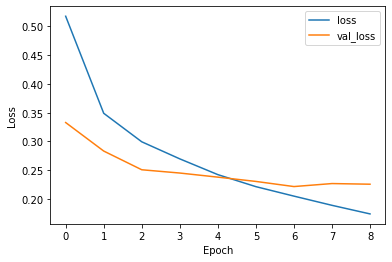

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2218 - accuracy: 0.9172


[0.22176368534564972, 0.9171666502952576]

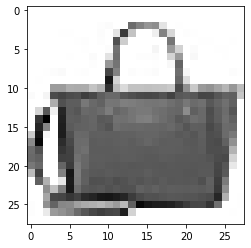

In [15]:
# 이미지 그려서 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
pred = model.predict(val_scaled[0:1])
print(pred.argmax())

1/1 [==============================] - 0s 106ms/step
8


In [17]:
import numpy as np

# 계단함수
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pred_class = classes[pred.argmax()]
print(pred_class)


Bag


## 시험 데이터로 확인하기

In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2410 - accuracy: 0.9127


[0.24096257984638214, 0.9126999974250793]